#Loading and Inspecting the Dataset

In [1]:
import pandas as pd

# Step 1: Load your dataset
file_path = 'Featured_dataset.csv'  # Specify your full file path here

try:
    # Load dataset
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head())
    
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path.")
    exit()  # Exit the script if the file is not found

Dataset loaded successfully!
   Longitude   Latitude  Speed  Distance                 Time     Acc X  \
0  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:12  0.046402   
1  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:12 -0.136978   
2  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13 -0.045355   
3  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13  0.242089   
4  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13 -0.230234   

      Acc Y     Acc Z  Heading    gyro_x  ...  Gyro_Change  Net_Displacement  \
0 -0.137178 -0.282934      352 -0.036306  ...     0.000000               0.0   
1  0.365242  0.108889      352  0.035776  ...    -0.005758               0.0   
2 -0.103340 -0.534985      352 -0.011871  ...    -0.007818               0.0   
3  0.072761 -0.350396      352 -0.017980  ...    -0.011512               0.0   
4  0.011765 -0.494085      352  0.011342  ...    -0.005381               0.0   

   Speed_Change  Heading_Change  Rollin

#Data Preprocessing (Handling Non-Numeric Columns)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Data Preprocessing
# Check the column names and inspect the data types
print("\nColumn Names in the Dataset:\n", data.columns)

# If 'timestamp' column exists, process it
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp'] = (data['timestamp'] - data['timestamp'].min()).dt.total_seconds()
else:
    print("Warning: No 'timestamp' column found. Skipping timestamp processing.")

# Handle categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# For simplicity, let's encode categorical columns to numeric using LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Show the data after preprocessing
print("\nData after Preprocessing:\n", data.head())



Column Names in the Dataset:
 Index(['Longitude', 'Latitude', 'Speed', 'Distance', 'Time', 'Acc X', 'Acc Y',
       'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z', 'label',
       'Acc_Magnitude', 'Acc_Change', 'Gyro_Magnitude', 'Gyro_Change',
       'Net_Displacement', 'Speed_Change', 'Heading_Change',
       'Rolling_Acc_Mean', 'Rolling_Acc_STD', 'acc_mean', 'acc_std',
       'gyro_mean', 'gyro_std'],
      dtype='object')

Data after Preprocessing:
    Longitude   Latitude  Speed  Distance  Time     Acc X     Acc Y     Acc Z  \
0  73.822661  18.501627    0.0       0.0   763  0.046402 -0.137178 -0.282934   
1  73.822661  18.501627    0.0       0.0   763 -0.136978  0.365242  0.108889   
2  73.822661  18.501627    0.0       0.0   764 -0.045355 -0.103340 -0.534985   
3  73.822661  18.501627    0.0       0.0   764  0.242089  0.072761 -0.350396   
4  73.822661  18.501627    0.0       0.0   764 -0.230234  0.011765 -0.494085   

   Heading    gyro_x  ...  Gyro_Change  Net_Displacement  S

#Splitting Data into Features and Target

In [3]:
# Separate features and target label
X = data.drop(columns=['label'])  # Features (all columns except 'label')
y = data['label']  # Labels (0 - normal, 1 - anomaly)

# Show the first few rows of features and target
print("\nFeatures (X):\n", X.head())
print("\nTarget (y):\n", y.head())



Features (X):
    Longitude   Latitude  Speed  Distance  Time     Acc X     Acc Y     Acc Z  \
0  73.822661  18.501627    0.0       0.0   763  0.046402 -0.137178 -0.282934   
1  73.822661  18.501627    0.0       0.0   763 -0.136978  0.365242  0.108889   
2  73.822661  18.501627    0.0       0.0   764 -0.045355 -0.103340 -0.534985   
3  73.822661  18.501627    0.0       0.0   764  0.242089  0.072761 -0.350396   
4  73.822661  18.501627    0.0       0.0   764 -0.230234  0.011765 -0.494085   

   Heading    gyro_x  ...  Gyro_Change  Net_Displacement  Speed_Change  \
0      352 -0.036306  ...     0.000000               0.0           0.0   
1      352  0.035776  ...    -0.005758               0.0           0.0   
2      352 -0.011871  ...    -0.007818               0.0           0.0   
3      352 -0.017980  ...    -0.011512               0.0           0.0   
4      352  0.011342  ...    -0.005381               0.0           0.0   

   Heading_Change  Rolling_Acc_Mean  Rolling_Acc_STD  acc_

#Scaling the Features

In [4]:
from sklearn.preprocessing import StandardScaler

# Scale features (important for models like IsolationForest or tree-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show scaled features
print("\nScaled Features (X_scaled):\n", X_scaled[:5])



Scaled Features (X_scaled):
 [[-1.06618119e+00 -1.32393787e+00 -1.09424801e+00 -2.31786829e-02
   1.17448444e-01  4.61118399e-02 -3.79125637e-01 -1.46633330e-01
   1.71319899e+00 -2.48075605e-01 -1.94115981e-02 -2.97237675e-01
  -8.43261584e-01 -1.61708329e-05 -6.49167516e-01  1.28167383e-05
  -2.43042081e-01  2.60625060e-18  1.36194608e-03 -2.63986348e-01
  -3.07284441e-01 -2.55256033e-01 -8.10031018e-01 -3.70229190e-01
  -7.96178702e-01]
 [-1.06618119e+00 -1.32393787e+00 -1.09424801e+00 -2.31786829e-02
   1.17448444e-01 -1.31764157e-01  2.20972187e-01  7.48918784e-02
   1.71319899e+00  2.63022549e-01 -3.33191468e-02  1.87758627e-01
  -7.86288704e-01  6.43037091e-02 -6.94357223e-01 -5.52975872e-02
  -2.43042081e-01  2.60625060e-18  1.36194608e-03 -2.63986348e-01
  -3.07284441e-01  8.76013401e-02 -7.18443469e-01  3.05365434e-01
  -6.86775803e-01]
 [-1.06618119e+00 -1.32393787e+00 -1.09424801e+00 -2.31786829e-02
   1.19869970e-01 -4.28909840e-02 -3.38708745e-01 -2.89135746e-01
   1.713

#Handling Class Imbalance

In [5]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Step 3: Handle Class Imbalance (if applicable)
# Compute class weights for balancing the data during training
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

# Print class weights
print("\nClass Weights:\n", class_weight_dict)



Class Weights:
 {np.int64(0): np.float64(1.2272570640937284), np.int64(1): np.float64(0.843757403458896)}


#Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Show the shape of the train and test sets
print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)



Training Set Shape: (9972, 25)
Test Set Shape: (4274, 25)


#Model Training using RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Step 5: Model Training using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
model.fit(X_train, y_train)

# Model is trained, print a message
print("\nRandom Forest model trained successfully!")



Random Forest model trained successfully!


#Model Evaluation: Classification Report

In [8]:
from sklearn.metrics import classification_report

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Classification report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1754
           1       0.99      0.99      0.99      2520

    accuracy                           0.99      4274
   macro avg       0.99      0.99      0.99      4274
weighted avg       0.99      0.99      0.99      4274



#Model Evaluation: Confusion Matrix

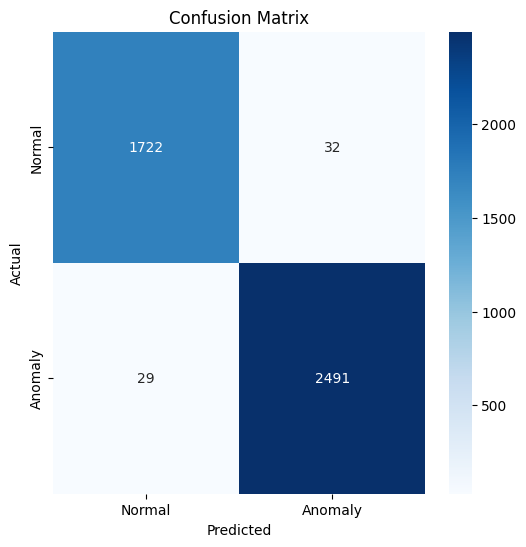

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Precision-Recall Curve

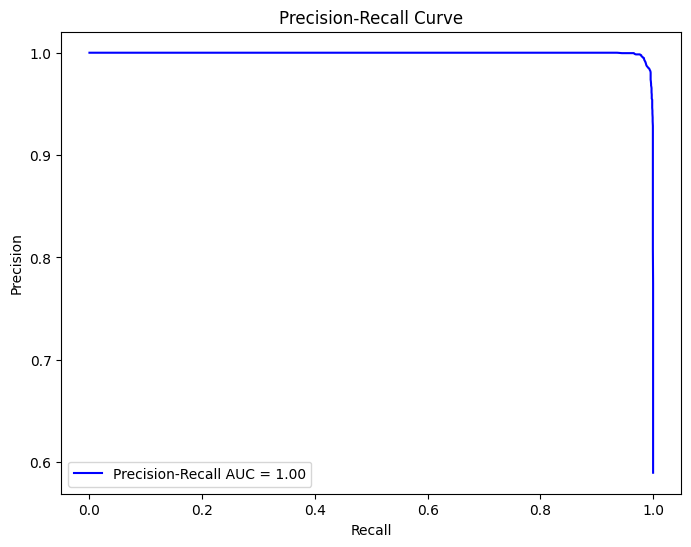

In [10]:
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (anomalous)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


#ROC Curve

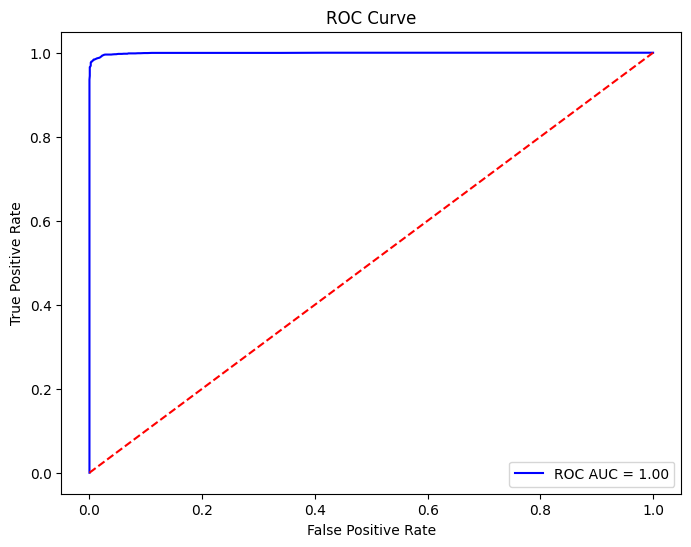

In [11]:
from sklearn.metrics import roc_curve, auc

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Model Tuning with GridSearchCV (optional)

In [12]:
from sklearn.model_selection import GridSearchCV

# Step 7: Model Tuning with GridSearchCV (optional, improves model performance)
# We can fine-tune the model by adjusting hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_model = grid_search.best_estimator_
print(f"Best model parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best model parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


#Evaluating the Tuned Model

In [13]:
# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1754
           1       0.99      0.99      0.99      2520

    accuracy                           0.99      4274
   macro avg       0.99      0.99      0.99      4274
weighted avg       0.99      0.99      0.99      4274



Tuned Model: Confusion Matrix

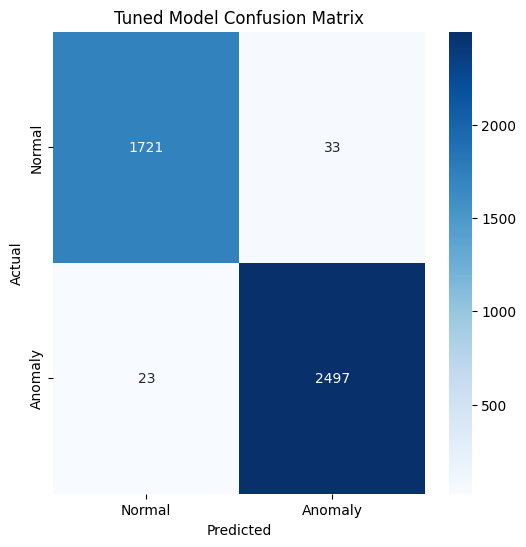

In [14]:
# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title("Tuned Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Tuned Model: ROC Curve

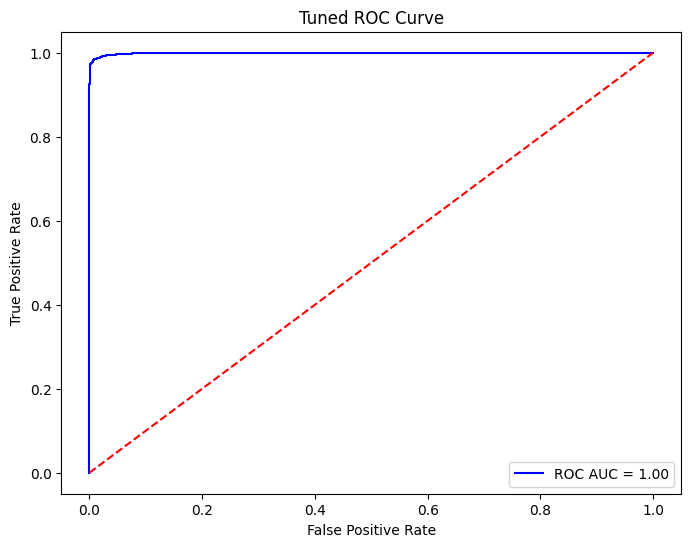

In [15]:
# ROC and AUC for tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='blue', label=f'ROC AUC = {roc_auc_tuned:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned ROC Curve')
plt.legend()
plt.show()


#Tuned Model: Precision-Recall Curve

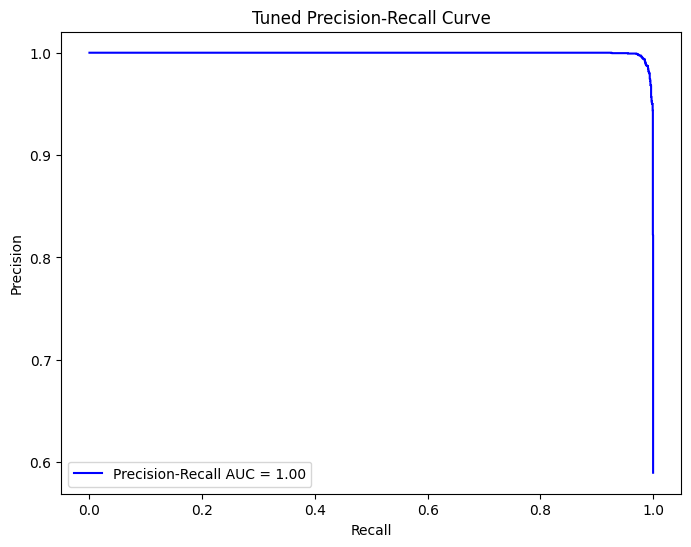

In [17]:
# Precision-Recall curve for tuned model
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_pred_proba_tuned)
pr_auc_tuned = auc(recall_tuned, precision_tuned)

plt.figure(figsize=(8, 6))
plt.plot(recall_tuned, precision_tuned, color='blue', label=f'Precision-Recall AUC = {pr_auc_tuned:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Precision-Recall Curve')
plt.legend()
plt.show()
